# Two Specific tasks

Data Science - CA#02: *Two specific tasks* - Spring 1403 \
This assignment includes specific tasks to investigate open-ended questions. The open-ended questions ask you to think creatively and critically about how the plots you have created provide insight into the data.


## Task 1

This dataset contains information about the passengers of the sunken ship ‘RMS Lusitania’.

### Dataset Introduction

|Column|Description|
|--|--|
|survived|Indicates if a passenger survived (1) or not (0)|
|pclass|The ticket class (1 = First class, 2 = Second class, 3 = Third class)|
|sex|The passenger's sex|
|age|The passenger's age in years|
|sibsp|The number of siblings or spouses the passenger had aboard the ship|
|parch|The number of parents or children the passenger had aboard the ship|
|fare|The fare the passenger paid for the ticket|
|embarked|The port where the passenger embarked|
|class|The class of the ticket the passenger had (First, Second, or Third)|
|who|Categorizes passengers as 'man', 'woman' or 'child', likely derived from age and sex|
|adult_male|A boolean indicating if the passenger is an adult male or not|
|deck|The deck the passenger's cabin was on, indicated by letters|
|embark_town|The town from which the passenger embarked, corresponding to the 'embarked' codes|
|alive|Indicates if the passenger survived ('yes') or not ('no')|
|alone|A boolean indicating if the passenger was traveling alone (no siblings, spouses, parents, or children aboard)|

### Preparation

In [183]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [184]:
from scipy.stats import pearsonr
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler

In [185]:
TASK1_DATA_PATH = 'task1.csv' 
PALETTE = ["#2E7B7C", "#3B9EA0", "#79CBCD", "#FFCAD4", "#FFBCDA", "#F39EC7", "#F765A3"]
COLOR_MAP = sns.color_palette(palette=PALETTE, as_cmap=True)
TEMP_VALE_NAN = 2000

### Questions

#### 1. First, read the file using the pandas library and save it in a pandas dataframe. Then, using the methods "info", "head", "tail" and "describe" from the pandas library, examine the general structure of the data, and explain what information each of the outputs shows.

In [186]:
datasetTask1 = pd.read_csv(TASK1_DATA_PATH)

In [187]:
datasetTask1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


1. The info() function provides a concise summary of a DataFrame. It displays the following information:
    - The total number of entries (rows) in the DataFrame.
    - The names and data types of each column.
    - The count of non-null values in each column.
    - Memory usage.

In [188]:
datasetTask1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


2. The head() function displays the first few rows of the DataFrame. By default, it shows the first 5 rows, but you can specify the number of rows to display. It's helpful for getting a quick glimpse of the data and understanding its structure.

In [189]:
datasetTask1.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


3. The tail() function displays the last few rows of the DataFrame. By default, it shows the last 5 rows, but like head(), you can specify the number of rows to display. It's useful for checking the end of the dataset.

In [190]:
datasetTask1.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. The describe() function generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution. It provides the following statistics for each numeric column:
    - Count: Number of non-null observations.
    - Mean: Average of the values.
    - Standard Deviation: Measure of the dispersion of values.
    - Minimum: Minimum value.
    - 25th Percentile (Q1): Value below which 25% of the data falls.
    - Median (50th Percentile or Q2): Middle value of the dataset.
    - 75th Percentile (Q3): Value below which 75% of the data falls.
    - Maximum: Maximum value.

For non-numeric columns, it provides count, unique, top (most frequently occurring value), and freq (frequency of the top value).

#### 2. Show the type of each data column. Some columns are of type categorical and some are of type numerical from the pandas library info. To process the non-numerical columns, one of the possible methods is labeling; in such a way that each of the categories is replaced by a number. For example, in this dataset, there is a categorical column named sex, which includes values Male and Female. Modify the values of this column, so that each of these models is mapped to one of the numbers in the range [0, 1].

In [191]:
datasetTask1.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [192]:
def handle_object_data(_df: pd.DataFrame, restricted = []):
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    label_encoder = LabelEncoder()
    df = _df.copy(deep=True)
    for l in df.columns:
        if l in restricted:
            continue
        if df[l].dtype.kind == 'O':
            categories = df[l].unique()
            if l == "class":
                class_mapping = {'First': 1, 'Second': 2, 'Third': 3}
                df[l] = df[l].fillna(TEMP_VALE_NAN).map(class_mapping)
                df[l].replace(TEMP_VALE_NAN,  np.NAN)
            elif len(categories) <= 2:
                encoded_values = df[l].fillna(TEMP_VALE_NAN)
                df[l] = label_encoder.fit_transform(df[l].values.reshape(-1, 1)).astype(int)
                df[l] = np.where(encoded_values == TEMP_VALE_NAN, np.nan, df[l])
            elif len(categories) >= 200:
                df.drop(l, axis=1, inplace=True)
            else:
                encoded_values = df[l].fillna(TEMP_VALE_NAN)
                df[l] = one_hot_encoder.fit_transform(df[l].values.reshape(-1, 1)).astype(int)
                df[l] = np.where(encoded_values == TEMP_VALE_NAN, np.nan, df[l])
            continue
            
    return df

In [193]:
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
datasetTask1 = handle_object_data(datasetTask1)
datasetTask1.dtypes

survived         int64
pclass           int64
sex            float64
age            float64
sibsp            int64
parch            int64
fare           float64
embarked       float64
class            int64
who            float64
adult_male        bool
deck           float64
embark_town    float64
alive          float64
alone             bool
dtype: object

#### 3. Generate a heatmap of the correlation matrix for numerical features in the dataset.

In [194]:
def show_correlation_matrix(correlation_matrix, size1, size2, title, square=True):
    plt.figure(figsize=(size1, size2))
    sns.heatmap(correlation_matrix, annot=True, cmap=COLOR_MAP, fmt=".2f", linewidths=0.5, square=square)
    plt.title(title)
    plt.show()

In [195]:
def all_correlation_matrix_for_numeric(df: pd.DataFrame):
    numerical_features = df.select_dtypes(include=['int64', 'float64'])
    correlation_matrix = numerical_features.corr()
    show_correlation_matrix(correlation_matrix, 10, 8, "Correlation Matrix of Numerical Features")



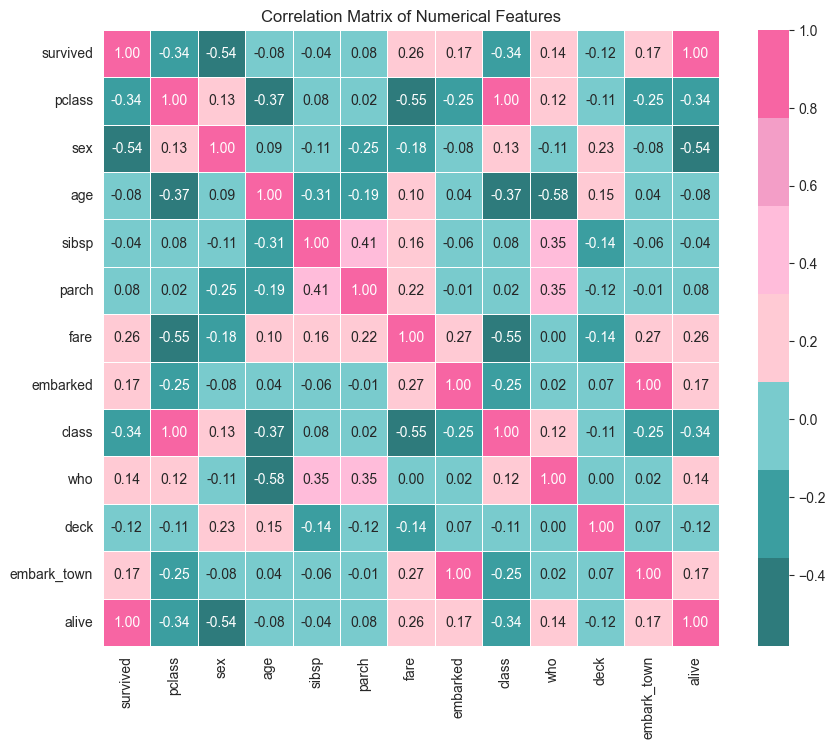

In [196]:
all_correlation_matrix_for_numeric(datasetTask1)

In [197]:
def goal_correlation_matrix_for_numeric(df: pd.DataFrame, goal):
    correlation_matrix = df.corr(method='pearson', numeric_only=True)
    corr = correlation_matrix[[goal]]
    show_correlation_matrix(corr, 8, 10, "Correlations with Goal column")

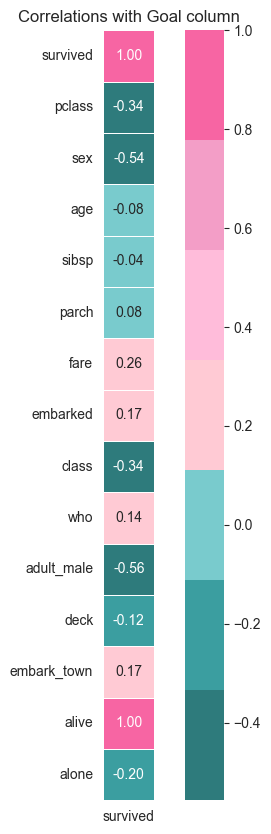

In [198]:
goal_correlation_matrix_for_numeric(datasetTask1,"survived")

#### 4. Columns that are not on the main diagonal and have a correlation of 1 mean that one column is extra and can be removed. Therefore, based on this, delete the extra columns that meet these conditions.

In [199]:
def remove_redundant_columns(df: pd.DataFrame):
    correlation_matrix = df.corr()
    num_columns = len(correlation_matrix.columns)
    for i in range(num_columns):
        for j in range(i + 1, num_columns):  
            if abs(correlation_matrix.iloc[i, j]) == 1:
                print(f"Columns '{correlation_matrix.columns[i]}' and '{correlation_matrix.columns[j]}' are same Dropping '{correlation_matrix.columns[j]}'")
                df.drop(correlation_matrix.columns[j], axis=1, inplace=True)
    show_correlation_matrix(df.corr(), 10, 8, "Correlation Matrix after removement")
    return df

Columns 'survived' and 'alive' are same Dropping 'alive'
Columns 'pclass' and 'class' are same Dropping 'class'
Columns 'embarked' and 'embark_town' are same Dropping 'embark_town'


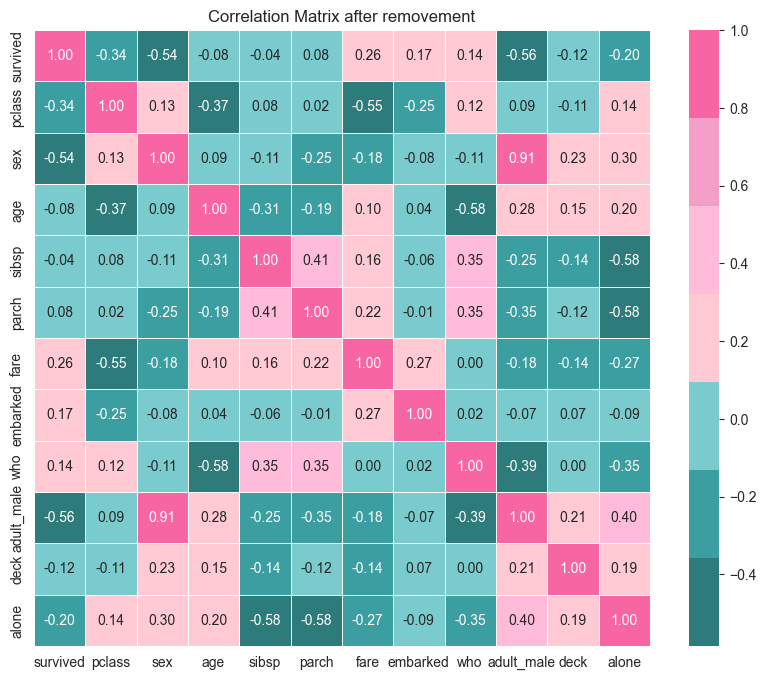

In [200]:
datasetTask1 = remove_redundant_columns(datasetTask1)

#### 5. How many passengers survived (survived == 1) the disaster?

In [201]:
(datasetTask1["survived"] == 1).sum()

342

#### 6. Find all female passengers aged more than 30 years. how many are there?

In [202]:
datasetTask1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,1.0,22.0,1,0,7.2500,0.0,0.0,True,NaN,False
1,1,1,0.0,38.0,1,0,71.2833,1.0,0.0,False,0.0,False
2,1,3,0.0,26.0,0,0,7.9250,0.0,0.0,False,NaN,True
3,1,1,0.0,35.0,1,0,53.1000,0.0,0.0,False,0.0,False
4,0,3,1.0,35.0,0,0,8.0500,0.0,0.0,True,NaN,True


In [203]:
filtered_df = datasetTask1[(datasetTask1['sex'] == 0) & (datasetTask1['age'] > 30)]
filtered_df.shape[0]

103

#### 7. Identify passengers who embarked from Cherbourg ('C') and paid a fare greater than $100.

In [204]:
filtered_df = datasetTask1[(datasetTask1['embarked'] == 1) & (datasetTask1['fare'] > 100)]
filtered_df.shape[0]

29

#### 8. Identify columns with missing values.Propose and apply a strategy for handling these missing values.

In [205]:
def get_missing_values(df: pd.DataFrame):
    total_entities = len(df)
    missing_values = df.isna().sum()
    missing_proportion = (missing_values / total_entities) * 100
    return pd.DataFrame({'feature':missing_values.index, 'Count':missing_values.values, 'Percent':missing_proportion.values})

In [206]:

lost_values = get_missing_values(datasetTask1)
lost_values

,feature,Count,Percent
0,survived,0,0.000000
1,pclass,0,0.000000
2,sex,0,0.000000
3,age,177,19.865320
4,sibsp,0,0.000000
5,parch,0,0.000000
6,fare,0,0.000000
7,embarked,2,0.224467
8,who,0,0.000000
9,adult_male,0,0.000000


In [207]:
def handle_missing_data(_df: pd.DataFrame, loss_values_stats: pd.DataFrame, del_threshold: float = 0.5, restricted_col=['NumPurchases']):
    mean_kind = ['i', 'f']
    mode_kind = ['O']
    df = _df.copy(deep=True)
    for feature, percent in zip(loss_values_stats['feature'], loss_values_stats['Percent']):
        if percent == 0 or feature in restricted_col:
            continue
        elif percent >= del_threshold * 100:
            df.drop(feature, axis=1, inplace=True)
        elif df[feature].dtype.kind in mean_kind:
            df[feature].fillna(df[feature].mean(), inplace=True)
        elif df[feature].dtype.kind in mode_kind:
            df[feature].fillna(df[feature].mode()[0], inplace=True)
            
    return df

In [208]:
datasetTask1 = handle_missing_data(datasetTask1, lost_values)
test = get_missing_values(datasetTask1)
test

,feature,Count,Percent
0,survived,0,0.0
1,pclass,0,0.0
2,sex,0,0.0
3,age,0,0.0
4,sibsp,0,0.0
5,parch,0,0.0
6,fare,0,0.0
7,embarked,0,0.0
8,who,0,0.0
9,adult_male,0,0.0


#### 9. What is the average age of passengers on the ship? How does it differ between males and females?

In [209]:
df_age_valid = datasetTask1.dropna(subset=['age'])
average_age_total = df_age_valid['age'].mean()
average_age_male = df_age_valid[df_age_valid['sex'] == 1]['age'].mean()
average_age_female = df_age_valid[df_age_valid['sex'] == 0]['age'].mean()

print("Overall average age:", average_age_total)
print("Average age for males:", average_age_male)
print("Average age for females:", average_age_female)

Overall average age: 29.69911764705882
Average age for males: 30.505824243042102
Average age for females: 28.21673004870738


#### 10.Is there a correlation between fare paid and survival rate? Provide a statistical summary.

In [210]:
def statistical_corr_summary(df: pd.DataFrame, feature, target):
    corr_coef, p_value = pearsonr(df[feature], df[target])

    print("Correlation Coefficient (r):", corr_coef)
    print("P-value:", p_value)

    if p_value < 0.05:
        if corr_coef > 0:
            print("There is a significant positive correlation between feature1 and feature2.")
        elif corr_coef < 0:
            print("There is a significant negative correlation between feature1 and feature2.")
        else:
            print("There is no significant correlation between feature1 and feature2.")
    else:
        print("The correlation between feature1 and feature2 is not statistically significant.")

    if abs(corr_coef) < 0.3:
        print("The correlation is weak.")
    elif abs(corr_coef) < 0.7:
        print("The correlation is moderate.")
    else:
        print("The correlation is strong.")

In [211]:
correlation_with_fare = datasetTask1['fare'].corr(datasetTask1['survived'])
summary = datasetTask1.describe()
print("Correlation coefficient between fare paid and survival:", correlation_with_fare)
statistical_corr_summary(datasetTask1, 'fare', 'survived')

Correlation coefficient between fare paid and survival: 0.2573065223849622
Correlation Coefficient (r): 0.2573065223849635
P-value: 6.1201893419225044e-15
There is a significant positive correlation between feature1 and feature2.
The correlation is weak.


#### 11.Use Matplotlib to plot the proportion of passengers that survived by class.

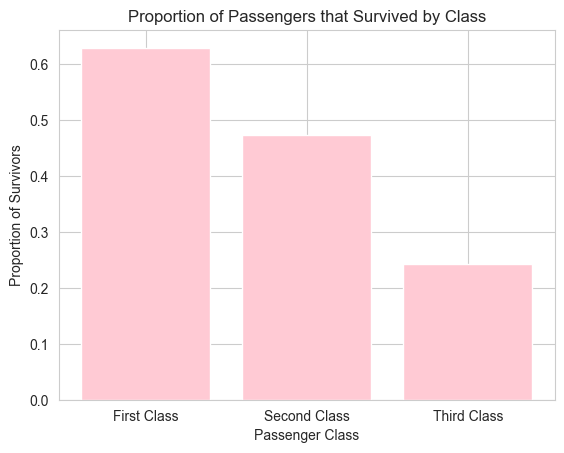

In [212]:
survival_proportion = datasetTask1.groupby('pclass')['survived'].mean()
plt.bar(survival_proportion.index, survival_proportion.values, color=PALETTE[3])

plt.xlabel('Passenger Class')
plt.ylabel('Proportion of Survivors')
plt.title('Proportion of Passengers that Survived by Class')

plt.xticks(survival_proportion.index, labels=['First Class', 'Second Class', 'Third Class'])

plt.show()

#### 12.Plot the age distribution of passengers, distinguishing between those who survived and those who didn't.

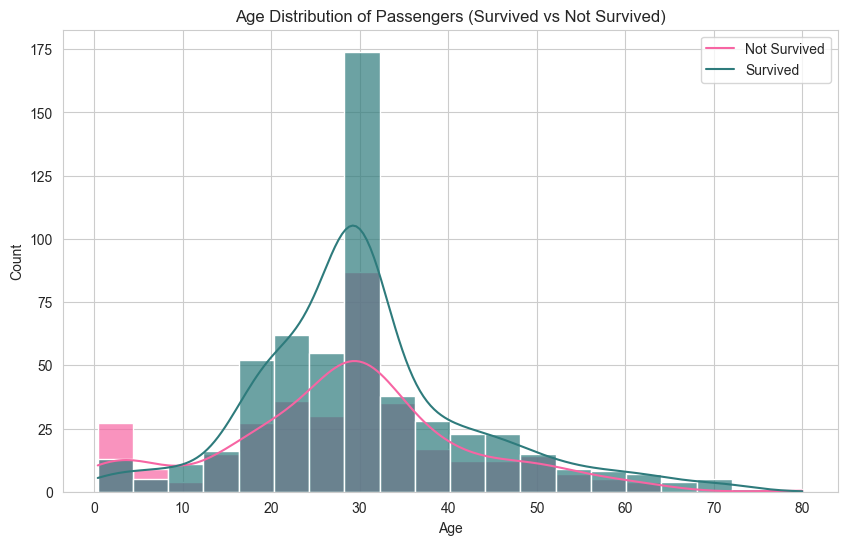

In [214]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=datasetTask1, x='age', hue='survived', bins=20, kde=True, palette={0: PALETTE[0], 1: PALETTE[-1]}, alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers (Survived vs Not Survived)')
plt.legend(['Not Survived', 'Survived'])

plt.show()

#### 13. Create a scatter plot showing the relationship between age and fare paid, color-coded by survival.

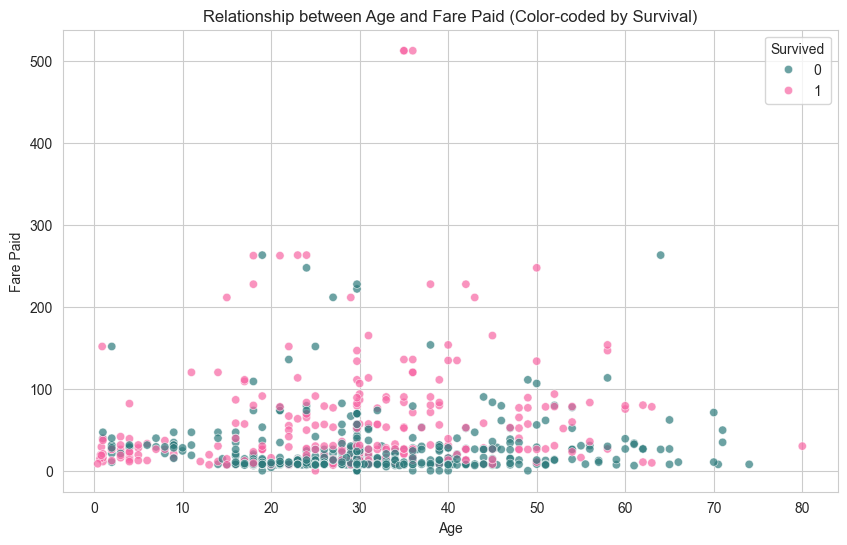

In [217]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datasetTask1, x='age', y='fare', hue='survived', palette={0: PALETTE[0], 1: PALETTE[-1]}, alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Fare Paid')
plt.title('Relationship between Age and Fare Paid (Color-coded by Survival)')
plt.legend(title='Survived', loc='upper right')

plt.show()


#### 14. Create a pivot table to show the average fare and survival rate for each class and sex combination.

In [218]:
pivot_table = pd.pivot_table(datasetTask1, index=['pclass', 'sex'], values=['fare', 'survived'], aggfunc={'fare': 'mean', 'survived': 'mean'})
pivot_table.columns = ['Average Fare', 'Survival Rate']
print(pivot_table)


            Average Fare  Survival Rate
pclass sex                             
1      0.0    106.125798       0.968085
       1.0     67.226127       0.368852
2      0.0     21.970121       0.921053
       1.0     19.741782       0.157407
3      0.0     16.118810       0.500000
       1.0     12.661633       0.135447


#### 15.Plot a grouped bar chart using Matplotlib to show the average fare paid by passengers, grouped by their class and survival status.

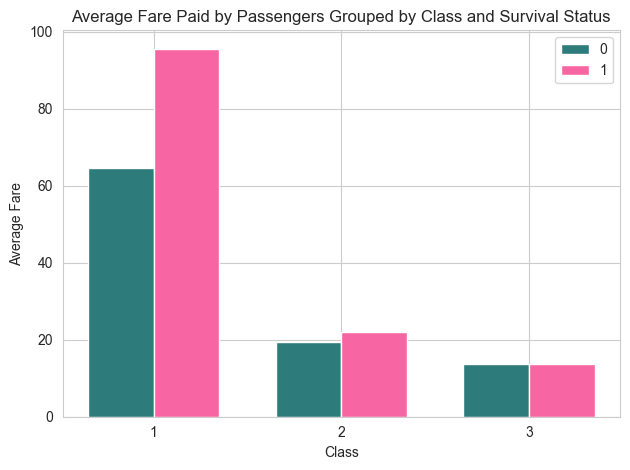

In [221]:
grouped_data = datasetTask1.groupby(['pclass', 'survived'])['fare'].mean().unstack()

num_classes = len(grouped_data)
num_survival_statuses = len(grouped_data.columns)
index = np.arange(num_classes)
bar_width = 0.35
fig, ax = plt.subplots()
for i, (survival_status, color) in enumerate(zip(grouped_data.columns, [PALETTE[0], PALETTE[-1]])):
    ax.bar(index + i * bar_width, grouped_data[survival_status], bar_width, label=survival_status, color=color)

ax.set_xlabel('Class')
ax.set_ylabel('Average Fare')
ax.set_title('Average Fare Paid by Passengers Grouped by Class and Survival Status')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grouped_data.index)
ax.legend()

plt.tight_layout()
plt.show()
